There is little we can provide descriptive statistics and visualizations when we have image datasets. We will calculate mean, standard deviation of the image diamentions, training, validation, and testing image sizes, and also we will a batch of images. 

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
import torch
import torch.utils.data as data 
import torchvision
from torchvision import datasets, transforms
from breastcancernet import config

In [28]:
# First i want to calculate mean and standard deviation of my training set
# to get the values for transforms.Normalize

traindata=datasets.ImageFolder(config.TRAIN_PATH, transform=transforms.ToTensor())
image_means =torch.stack([t.mean(1).mean(1) for t, c in traindata])
image_means.mean(0)

tensor([0.8023, 0.6129, 0.7238])

In [29]:
image_stds =torch.stack([t.std(1).std(1) for t, c in traindata])
image_stds.std(0)

tensor([0.0158, 0.0219, 0.0178])

In [30]:
# Transform the data to torch tensors and normalize it 

transform_idc = transforms.Compose([transforms.RandomResizedCrop(48),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.RandomVerticalFlip(),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean=[0.8023, 0.6129, 0.7238], 
                                                           std=[0.0158, 0.0219, 0.0178])]) 


# Prepare training set, validation set and testing set
trainset = datasets.ImageFolder(config.TRAIN_PATH, transform=transform_idc)
valset = datasets.ImageFolder(config.VAL_PATH, transform=transform_idc)
testset = datasets.ImageFolder(config.TEST_PATH, transform=transform_idc )

#parameters 
params = {'batch_size': 32,
          'shuffle': True,
          'num_workers': 4}

# Prepare training loader and testing loader (makes datasets iterable)

trainloader = data.DataLoader(trainset, **params)
valloader = data.DataLoader(valset, **params)
testloader = data.DataLoader(testset, **params)

In [31]:
print(trainset,valset, testset)

Dataset ImageFolder
    Number of datapoints: 71899
    Root location: datasets/idc\training
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(48, 48), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
               RandomHorizontalFlip(p=0.5)
               RandomVerticalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.8023, 0.6129, 0.7238], std=[0.0158, 0.0219, 0.0178])
           ) Dataset ImageFolder
    Number of datapoints: 7988
    Root location: datasets/idc\validation
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(48, 48), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
               RandomHorizontalFlip(p=0.5)
               RandomVerticalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.8023, 0.6129, 0.7238], std=[0.0158, 0.0219, 0.0178])
           ) Dataset ImageFolder
    Number of datapoints: 19972
    Root loca

## Training set, Validation set, and Testing set Size

In [32]:
print('There are {} images in the training set'.format(len(trainset)))
print('There are {} images in the validation set'.format(len(valset)))
print('There are {} images in the testing set'.format(len(testset)))
print('There are {} batches in the training loader'.format(len(trainloader)))
print('There are {} batches in the validation loader'.format(len(valloader)))
print('There are {} batches in the testing loader'.format(len(testloader)))

There are 71899 images in the training set
There are 7988 images in the validation set
There are 19972 images in the testing set
There are 2247 batches in the training loader
There are 250 batches in the validation loader
There are 625 batches in the testing loader


## Show a batch of images 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


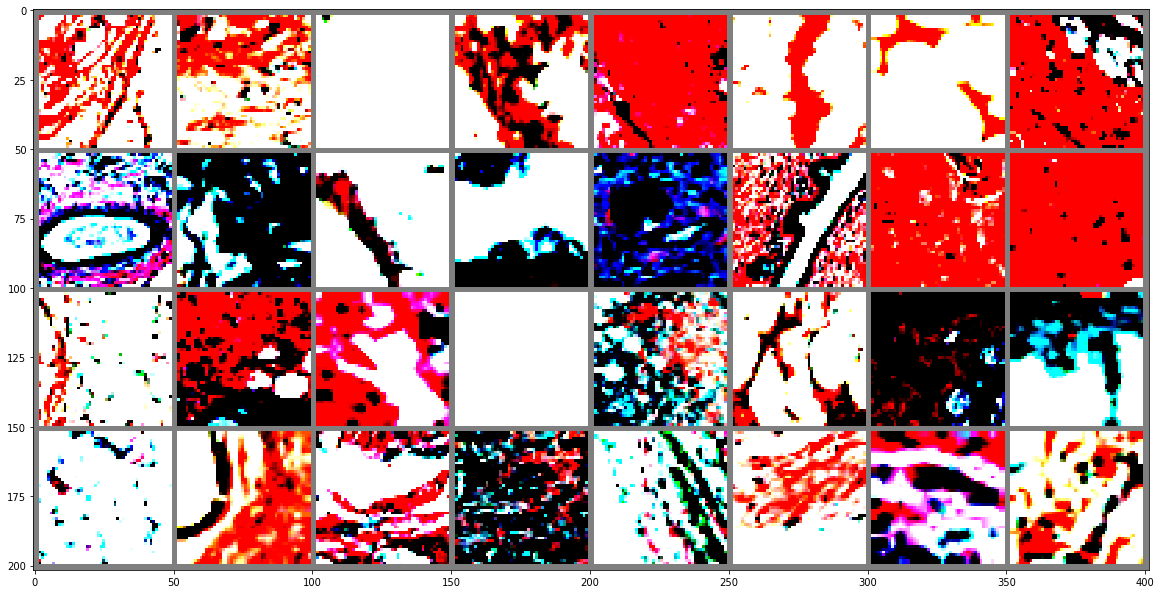

In [33]:
#Show a batch of images
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(20,20))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()


# show images
imshow(torchvision.utils.make_grid(images))